In [114]:
%load_ext autoreload
%autoreload 2

import os

subj = "phase2/Subj29"

UNIQUE_VALUES_THRESHOLD = 200

exp = "exp_reduced_flow"
os.makedirs(f"{subj}/{exp}", exist_ok = True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
import typing

import mne
import numpy
import pandas
import IPython.display
import sklearn.metrics
import sklearn.preprocessing
import sklearn.decomposition
import matplotlib.pyplot as plt

import SDA.topology
import SDA.analytics
import SDA.clustquality
import SDA.stageprocess

### Data

Reading d:\HSE\year-3\HSE\CourseProject\phase2\Subj29\src\epochs_filt_rr-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     498.00 ms
        0 CTF compensation matrices available
Not setting metadata
969 matching events found
No baseline correction applied
0 projection items activated
Stages:  3
No projector specified for this dataset. Please consider the method self.add_proj.


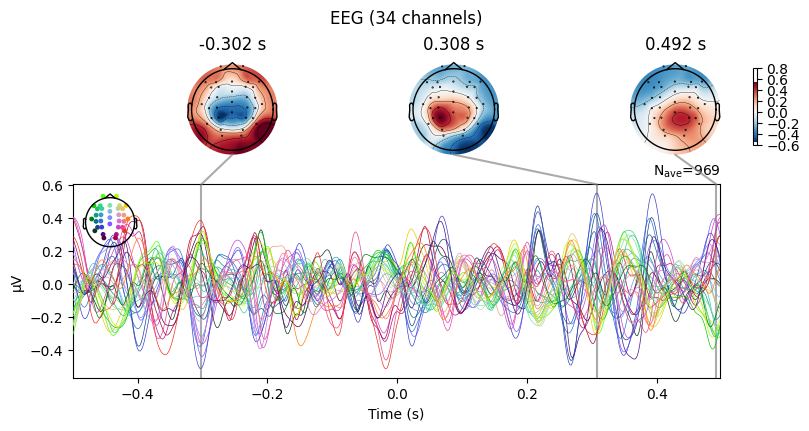

(969, 34, 500)


In [116]:
epochs = mne.read_epochs(f"{subj}/src/epochs_filt_rr-epo.fif").drop_channels(ch_names = [ 'IVEOG', 'IHEOG' ])
N_STAGES = int(numpy.loadtxt(f"{subj}/src/n_stages.txt"))
print('Stages: ', N_STAGES)

epochs.average().plot_joint().savefig(f"{subj}/{exp}/eeg.svg")
data = epochs.get_data(copy = True)
print(data.shape)

### Features

In [117]:
per_channel_folder = f"{subj}/{exp}/features/per_channel"
os.makedirs(per_channel_folder, exist_ok = True)
per_channel_extractor = SDA.topology.PerChannelFeatureExtractor(n_jobs = -1, folder = per_channel_folder, reduced = True)
per_channel_features = per_channel_extractor.extract(data)

dissimilarity_folder = f"{subj}/{exp}/features/dissimilarity"
os.makedirs(dissimilarity_folder, exist_ok = True)
dissimilarity_extractor = SDA.topology.DissimilarityFeatureExtractor(n_jobs = -1, folder = dissimilarity_folder, reduced = True)
dissimilarity_features = dissimilarity_extractor.extract(data)

overall_folder = f"{subj}/{exp}/features/overall"
os.makedirs(overall_folder, exist_ok = True)
overall_extractor = SDA.topology.OverallFeatureExtractor(n_jobs = -1, folder = overall_folder, reduced = True)
overall_features = overall_extractor.extract(data)

all_features = pandas.concat([
    per_channel_features,
    dissimilarity_features,
    overall_features
], axis = 1)

all_features.to_feather(f"{subj}/{exp}/features/all_features.feather")
display(all_features)

Got features from phase2/Subj29/exp_reduced_flow/features/per_channel/features.feather
Got features from phase2/Subj29/exp_reduced_flow/features/overall/features.feather


,channel-0 landscape dim-1 max,channel-0 landscape dim-1 mean,channel-0 landscape dim-1 std,channel-0 landscape dim-1 sum,channel-0 landscape dim-1 norm-1,channel-0 landscape dim-1 norm-2,channel-0 landscape dim-2 max,channel-0 landscape dim-2 mean,channel-0 landscape dim-2 std,channel-0 landscape dim-2 sum,...,overall bd2 dim-2 std,overall bd2 dim-2 sum,overall bd2 dim-2 norm-1,overall bd2 dim-2 norm-2,overall bd2 dim-3 max,overall bd2 dim-3 mean,overall bd2 dim-3 std,overall bd2 dim-3 sum,overall bd2 dim-3 norm-1,overall bd2 dim-3 norm-2
0,1.773656e-06,1.050373e-07,3.101032e-07,0.000011,0.000011,0.000003,1.566175e-07,3.030082e-09,1.945301e-08,3.030082e-07,...,0.000008,0.001120,0.001120,0.000266,0.000064,0.000062,1.540106e-06,0.000124,0.000124,0.000088
1,1.980857e-06,1.509048e-07,4.202301e-07,0.000015,0.000015,0.000004,1.486452e-06,5.079417e-08,2.141009e-07,5.079417e-06,...,0.000002,0.001936,0.001936,0.000337,0.000062,0.000060,1.129796e-06,0.000483,0.000483,0.000171
2,8.372213e-07,5.561075e-08,1.766984e-07,0.000006,0.000006,0.000002,3.124383e-08,3.124383e-10,3.108722e-09,3.124383e-08,...,0.000001,0.001321,0.001321,0.000254,0.000054,0.000051,1.820316e-06,0.000659,0.000659,0.000183
3,1.087454e-06,4.202687e-08,1.746137e-07,0.000004,0.000004,0.000002,2.394159e-07,6.780013e-09,3.242642e-08,6.780013e-07,...,0.000004,0.001033,0.001033,0.000221,0.000058,0.000050,7.318876e-06,0.000101,0.000101,0.000072
4,2.757920e-06,1.804777e-07,5.491302e-07,0.000018,0.000018,0.000006,4.302569e-07,1.428381e-08,6.243497e-08,1.428381e-06,...,0.000002,0.001194,0.001194,0.000255,0.000063,0.000063,7.014823e-07,0.000125,0.000125,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1.113198e-06,7.060664e-08,2.203888e-07,0.000007,0.000007,0.000002,2.347296e-07,7.484231e-09,3.605213e-08,7.484231e-07,...,0.000003,0.001271,0.001271,0.000260,0.000058,0.000056,1.486379e-06,0.000733,0.000733,0.000203
965,5.722828e-07,2.589301e-08,9.792468e-08,0.000003,0.000003,0.000001,6.591881e-08,6.591881e-10,6.558839e-09,6.591881e-08,...,0.000002,0.000959,0.000959,0.000205,0.000051,0.000049,2.996270e-06,0.000194,0.000194,0.000097
966,2.107391e-06,1.154753e-07,3.780098e-07,0.000012,0.000012,0.000004,4.245444e-08,1.221275e-09,6.947772e-09,1.221275e-07,...,0.000003,0.000834,0.000834,0.000197,0.000052,0.000046,3.675179e-06,0.000186,0.000186,0.000093
967,1.252025e-06,9.702087e-08,2.690797e-07,0.000010,0.000010,0.000003,2.483082e-07,6.276225e-09,3.386692e-08,6.276225e-07,...,0.000004,0.001098,0.001098,0.000235,0.000056,0.000053,3.119587e-06,0.000105,0.000105,0.000075


In [118]:
features = sklearn.preprocessing.StandardScaler().fit_transform(all_features)
features = pandas.DataFrame(features, columns = all_features.columns)

features.to_feather(f"{subj}/{exp}/features/features.feather")
display(features)

numpy.save(f"{subj}/{exp}/features/features.npy", features.to_numpy())

,channel-0 landscape dim-1 max,channel-0 landscape dim-1 mean,channel-0 landscape dim-1 std,channel-0 landscape dim-1 sum,channel-0 landscape dim-1 norm-1,channel-0 landscape dim-1 norm-2,channel-0 landscape dim-2 max,channel-0 landscape dim-2 mean,channel-0 landscape dim-2 std,channel-0 landscape dim-2 sum,...,overall bd2 dim-2 std,overall bd2 dim-2 sum,overall bd2 dim-2 norm-1,overall bd2 dim-2 norm-2,overall bd2 dim-3 max,overall bd2 dim-3 mean,overall bd2 dim-3 std,overall bd2 dim-3 sum,overall bd2 dim-3 norm-1,overall bd2 dim-3 norm-2
0,0.743649,0.414099,0.417099,0.414099,0.414099,0.413109,-0.499435,-0.440412,-0.464839,-0.440412,...,2.834135,-0.197066,-0.197066,0.310873,0.514827,0.607856,-0.210496,-0.731976,-0.731976,-0.566371
1,1.115464,1.162140,1.254094,1.162140,1.162140,1.237074,7.405579,10.263053,8.560423,10.263053,...,-1.050444,1.422874,1.422874,1.518707,0.422365,0.499280,-0.447904,0.553379,0.553379,0.799478
2,-0.936754,-0.391985,-0.596814,-0.391985,-0.391985,-0.570481,-1.244701,-1.049409,-1.222676,-1.049409,...,-1.418229,0.202750,0.202750,0.110603,-0.075396,-0.131377,-0.048364,1.181246,1.181246,0.995348
3,-0.487720,-0.613520,-0.612659,-0.613520,-0.613520,-0.609521,-0.007251,0.399911,0.136701,0.399911,...,0.388370,-0.369278,-0.369278,-0.454725,0.144868,-0.156125,3.133139,-0.816451,-0.816451,-0.828915
4,2.509880,1.644437,2.233771,1.644437,1.644437,2.147034,1.127176,2.081439,1.528111,2.081439,...,-0.973758,-0.050746,-0.050746,0.115525,0.488067,0.633929,-0.695729,-0.729093,-0.729093,-0.557359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,-0.441522,-0.147421,-0.264755,-0.147421,-0.147421,-0.250981,-0.035108,0.557720,0.304815,0.557720,...,-0.450218,0.103263,0.103263,0.203838,0.193925,0.237044,-0.241582,1.446038,1.446038,1.331956
965,-1.412178,-0.876643,-1.195517,-0.876643,-0.876643,-1.151315,-1.038581,-0.971706,-1.062704,-0.971706,...,-0.759313,-0.516834,-0.516834,-0.733793,-0.241297,-0.270284,0.632050,-0.481713,-0.481713,-0.411804
966,1.342526,0.584329,0.933208,0.584329,0.584329,0.882500,-1.178061,-0.845748,-1.044670,-0.845748,...,-0.641964,-0.766016,-0.766016,-0.869855,-0.171606,-0.405923,1.024872,-0.511709,-0.511709,-0.478969
967,-0.192402,0.283362,0.105309,0.283362,0.283362,0.126869,0.045608,0.287017,0.203493,0.287017,...,0.024343,-0.241845,-0.241845,-0.226308,0.032360,-0.002919,0.703403,-0.799511,-0.799511,-0.784053


### Feature selection

In [119]:
os.makedirs(f"{subj}/{exp}/qsda", exist_ok = True)
qsda = SDA.QSDA(
    n_jobs = 1,
    qsda_n_jobs = 15,
    scores_folder = f"{subj}/{exp}/qsda",

    threshold = 1150,
    min_unique_values = UNIQUE_VALUES_THRESHOLD
)
best_features, scores = qsda.select(features)

best_features.to_feather(f"{subj}/{exp}/qsda/best_features.feather")
numpy.save(f"{subj}/{exp}/qsda/best_features.npy", features.to_numpy())
display(best_features)
display(scores)

Using threshold 0.24


,channel-0 silhouette-1 dim-1 mean,channel-0 silhouette-1 dim-1 sum,channel-0 silhouette-1 dim-1 norm-1,channel-0 silhouette-1 dim-2 std,channel-0 silhouette-1 dim-2 norm-2,channel-0 silhouette-2 dim-1 mean,channel-0 silhouette-2 dim-1 sum,channel-0 silhouette-2 dim-1 norm-1,channel-0 silhouette-2 dim-2 mean,channel-0 silhouette-2 dim-2 sum,...,overall amplitude-silhouette-1-2 norm-1,overall amplitude-silhouette-1-2 norm-2,overall amplitude-silhouette-2-1 dim-2,overall life dim-3 sum,overall life dim-3 norm-1,overall bd2 all max,overall bd2 all mean,overall bd2 dim-1 max,overall bd2 dim-1 mean,overall bd2 dim-2 mean
0,0.306991,0.306991,0.306991,-0.370752,-0.370190,0.268660,0.268660,0.268660,-0.327176,-0.327176,...,0.114918,0.171391,-1.019060,-0.788911,-0.788911,2.366771,1.802590,3.310754,2.018429,1.473673
1,1.140926,1.140926,1.140926,10.009802,10.096125,0.557346,0.557346,0.557346,11.451019,11.451019,...,-0.386816,-0.371275,-0.382682,-0.011724,-0.011724,0.181622,1.178803,0.347441,1.153311,0.943448
2,-0.533967,-0.533967,-0.533967,-0.745918,-0.742820,-0.459228,-0.459228,-0.459228,-0.607888,-0.607888,...,-0.874130,-0.849643,-0.739927,0.785742,0.785742,-0.787314,-0.341411,-0.849342,-0.409544,-0.501265
3,-0.511402,-0.511402,-0.511402,-0.368254,-0.363307,-0.382504,-0.382504,-0.382504,-0.176234,-0.176234,...,-0.647678,-0.597251,-1.227171,-0.829776,-0.829776,-0.358551,-0.537683,-0.105128,-0.368594,-0.794038
4,1.308391,1.308391,1.308391,0.433425,0.436951,2.058553,2.058553,2.058553,0.420804,0.420804,...,-0.026225,-0.254337,3.716144,-0.935903,-0.935903,0.309517,0.450156,-0.006483,0.571391,0.289683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,-0.385286,-0.385286,-0.385286,-0.308677,-0.303530,-0.334388,-0.334388,-0.334388,-0.196846,-0.196846,...,1.336554,1.286179,1.968657,1.525692,1.525692,0.201890,0.441588,0.778257,0.299376,0.097835
965,-0.724808,-0.724808,-0.724808,-0.566958,-0.565929,-0.548585,-0.548585,-0.548585,-0.503350,-0.503350,...,-0.348946,-0.312055,-0.514990,-0.676368,-0.676368,-1.110257,-1.279957,-1.105753,-1.306174,-1.296060
966,0.391705,0.391705,0.391705,-0.700273,-0.696803,0.348704,0.348704,0.348704,-0.553400,-0.553400,...,-0.533611,-0.547207,0.353818,-0.569131,-0.569131,-0.974595,-0.911463,-0.827337,-0.845922,-0.892191
967,-0.030469,-0.030469,-0.030469,-0.099971,-0.096933,-0.111603,-0.111603,-0.111603,-0.098977,-0.098977,...,-0.013907,0.017613,-0.542267,-0.812527,-0.812527,-0.577557,-0.146795,-0.467322,-0.043317,-0.360479


,name,score,mean,variance,unique_values,normalized_score
0,channel-0 landscape dim-1 max,0.223856,-6.599468e-17,1.0,969,0.050603
1,channel-0 landscape dim-1 mean,0.391104,-1.466548e-17,1.0,969,0.098544
2,channel-0 landscape dim-1 std,0.225962,-6.599468e-17,1.0,969,0.051206
3,channel-0 landscape dim-1 sum,0.391104,-1.393221e-16,1.0,969,0.098544
4,channel-0 landscape dim-1 norm-1,0.391104,-1.393221e-16,1.0,969,0.098544
...,...,...,...,...,...,...
4167,overall bd2 dim-3 mean,0.389396,1.833186e-16,1.0,912,0.098054
4168,overall bd2 dim-3 std,0.470643,-1.136575e-16,1.0,805,0.121344
4169,overall bd2 dim-3 sum,0.868439,-7.332742e-18,1.0,912,0.235372
4170,overall bd2 dim-3 norm-1,0.868439,-7.332742e-18,1.0,912,0.235372


### Results

#### Estimator

In [120]:
def analyze(all_features: pandas.DataFrame, n_components: int, folder: str):
    folder = f"{subj}/{exp}/results/{folder}"
    os.makedirs(folder, exist_ok = True)

    # Scale features
    all_features = sklearn.preprocessing.StandardScaler().fit_transform(all_features)
    print(all_features.shape)
    numpy.save(f"{folder}/all_features.npy", all_features)
    numpy.savetxt(f"{folder}/all_features_shape.txt", all_features.shape)

    # PCA
    pca = sklearn.decomposition.PCA(n_components = n_components, svd_solver = "full", random_state = 42)
    pca_features = pca.fit_transform(all_features)
    print(pca_features.shape)
    numpy.save(f"{folder}/pca_features.npy", pca_features)
    numpy.savetxt(f"{folder}/pca_features_shape.txt", pca_features.shape)
    
    print('Explained variance', round(pca.explained_variance_ratio_.sum(), 2))
    print([ round(x, 3) for x in pca.explained_variance_ratio_ ])
    numpy.savetxt(f"{folder}/explained_variance.txt", [ pca.explained_variance_ratio_.sum() ])
    numpy.savetxt(f"{folder}/explained_variance_ratios.txt", pca.explained_variance_ratio_)

    # SDA
    sda = SDA.SDA(n_jobs = -1, scale = False, verbose = True)
    results, df_st_edges = sda.apply(pca_features)
    
    results.to_csv(f"{folder}/results.csv")
    df_st_edges.to_csv(f"{folder}/df_st_edges.csv")

    # Analyze
    best_results = SDA.analytics.best_results(results, key = 'Avg-Silh')
    best_results.to_csv(f"{folder}/best_results.csv")
    
    best_result = SDA.analytics.best_result(results, key = 'Avg-Silh', n_stages = N_STAGES)
    best_result_df = pandas.DataFrame([ best_result ])
    best_result_df.to_csv(f"{folder}/best_result.csv")
    display(best_result_df)
    
    best_edges = numpy.array(best_result['St_edges'])
    numpy.savetxt(f"{folder}/best_edges.txt", best_edges, fmt = "%d", newline = ' ')
    display(best_edges)

    stage_timing = SDA.analytics.stage_timing(best_edges, epochs)
    stage_timing.to_csv(f"{folder}/stage_timing.csv")
    display(stage_timing)
    
    SDA.analytics.plot_stats(pca_features, epochs, best_result, df_st_edges).savefig(f"{folder}/stats.svg")

#### Традиционные признаки

(969, 341)
(969, 15)
Explained variance 0.67
[0.242, 0.106, 0.074, 0.038, 0.032, 0.026, 0.023, 0.021, 0.019, 0.018, 0.017, 0.015, 0.014, 0.014, 0.013]
Applying to 969 samples with 15 features each


stage 2: 100%|██████████| 672/672 [00:08<00:00, 82.49it/s] 


,St_len_min,K_nb_max,N_cl_max,Cl_cen,Len_min,St_edges,N_stages,Longest_stage,Shortest_stage,Avg_stage_length,Ward_dist,Cen_dist,Silh,Cal-Har,Dav-Bold,Avg-Silh,Avg-Cal-Har,Avg-Dav-Bold
0,0,45,10,Median,40,"[0, 43, 308, 969]",3,661,43,323.0,13041.707455,12.461898,0.085817,91.924643,2.410589,0.156008,69.164694,2.239567


array([  0,  43, 308, 969])

,0,1,2
"Start-end time, sec","(9.5, 52.5)","(53.5, 324.5)","(325.5, 1004.5)"
"Time length, sec",43.0,271.0,679.0
Number of epochs,43,265,661


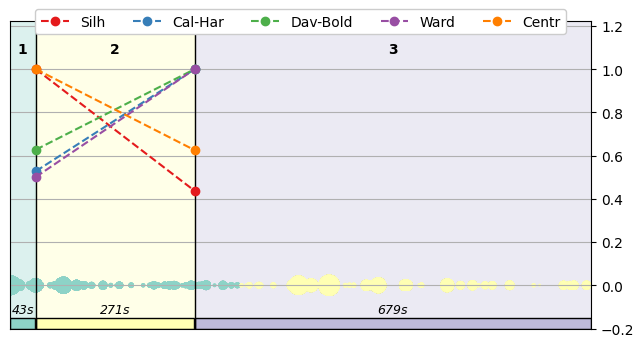

In [121]:
def read_traditional():
    df_ft_psd_loc_db = pandas.read_feather(f'{subj}/src/df_ft_psd_loc_db.feather')
    df_ft_psd_ind_loc_log = pandas.read_feather(f'{subj}/src/df_ft_psd_ind_loc_log.feather')
    df_ft_coh_ind_loc = pandas.read_feather(f'{subj}/src/df_ft_coh_ind_loc.feather')
    df_ft_plv_ind_loc = pandas.read_feather(f'{subj}/src/df_ft_plv_ind_loc.feather')

    result =  pandas.concat([
        df_ft_psd_loc_db,
        df_ft_psd_ind_loc_log,
        df_ft_coh_ind_loc,
        df_ft_plv_ind_loc
    ], axis = 1)

    if subj == "Subj2":
        result = result[:-2]
    return result

analyze(read_traditional(), 15, "traditional")

#### Топологические признаки + QSDA + PCA

(969, 1179)
(969, 15)
Explained variance 0.55
[0.147, 0.052, 0.041, 0.039, 0.036, 0.035, 0.031, 0.029, 0.027, 0.023, 0.021, 0.02, 0.018, 0.018, 0.016]
Applying to 969 samples with 15 features each


stage 2: 100%|██████████| 672/672 [00:07<00:00, 87.21it/s] 


,St_len_min,K_nb_max,N_cl_max,Cl_cen,Len_min,St_edges,N_stages,Longest_stage,Shortest_stage,Avg_stage_length,Ward_dist,Cen_dist,Silh,Cal-Har,Dav-Bold,Avg-Silh,Avg-Cal-Har,Avg-Dav-Bold
0,40,35,15,Median,40,"[0, 106, 488, 969]",3,481,106,323.0,8592.102987,8.319356,-0.000238,18.169709,5.621228,0.068688,14.041469,5.215746


array([  0, 106, 488, 969])

,0,1,2
"Start-end time, sec","(9.5, 115.5)","(116.5, 505.5)","(506.5, 1004.5)"
"Time length, sec",106.0,389.0,498.0
Number of epochs,106,382,481


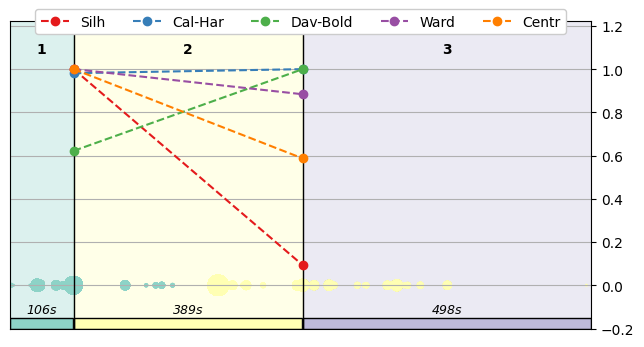

In [122]:
analyze(best_features, 15, "best_topological")

#### Традиционные и топологические вместе + PCA

(969, 1520)
(969, 15)
Explained variance 0.51
[0.15, 0.048, 0.043, 0.033, 0.032, 0.029, 0.027, 0.025, 0.021, 0.021, 0.018, 0.017, 0.017, 0.015, 0.014]
Applying to 969 samples with 15 features each


stage 2: 100%|██████████| 672/672 [00:08<00:00, 83.40it/s] 


,St_len_min,K_nb_max,N_cl_max,Cl_cen,Len_min,St_edges,N_stages,Longest_stage,Shortest_stage,Avg_stage_length,Ward_dist,Cen_dist,Silh,Cal-Har,Dav-Bold,Avg-Silh,Avg-Cal-Har,Avg-Dav-Bold
0,0,35,20,Median,40,"[0, 90, 507, 969]",3,462,90,323.0,19583.240826,13.135396,0.02444,36.973549,4.373413,0.095722,27.080942,3.923971


array([  0,  90, 507, 969])

,0,1,2
"Start-end time, sec","(9.5, 99.5)","(100.5, 524.5)","(525.5, 1004.5)"
"Time length, sec",90.0,424.0,479.0
Number of epochs,90,417,462


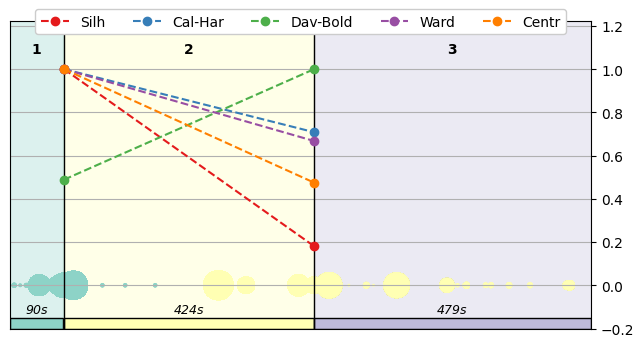

In [123]:
combined_features = pandas.concat([ read_traditional(), best_features ], axis = 1)
analyze(combined_features, 15, "combined")

### Information value

In [124]:
result_edges = numpy.loadtxt(f"{subj}/{exp}/results/best_topological/best_edges.txt").astype(numpy.int32)
print(result_edges)

if os.path.exists(f"{subj}/{exp}/IV/IV.csv"):
    ivs = pandas.read_csv(f"{subj}/{exp}/IV/IV.csv")
else:
    _, labels = SDA.stageprocess.form_stage_bands(result_edges)
    ivs = SDA.analytics.IV.calc_IV_clust(features, labels)

    os.makedirs(f"{subj}/{exp}/IV", exist_ok = True)
    ivs.to_csv(f"{subj}/{exp}/IV/IV.csv", index = False)

ivs["normalized_iv"] = sklearn.preprocessing.MinMaxScaler().fit_transform(ivs[["IV"]])
display(ivs)

[  0 106 488 969]


IV: 100%|██████████| 4172/4172 [00:06<00:00, 613.49it/s]


,Feature,IV,IVs,normalized_iv
0,channel-0 landscape dim-1 max,0.111964,"[0.20138646551809197, 0.06685946412940923, 0.0...",0.080124
1,channel-0 landscape dim-1 mean,0.139260,"[0.2500171388678342, 0.09029702657622114, 0.07...",0.104254
2,channel-0 landscape dim-1 std,0.146506,"[0.2982126904716804, 0.07577274797632753, 0.06...",0.110659
3,channel-0 landscape dim-1 sum,0.139260,"[0.2500171388678342, 0.09029702657622114, 0.07...",0.104254
4,channel-0 landscape dim-1 norm-1,0.139260,"[0.2500171388678342, 0.09029702657622114, 0.07...",0.104254
...,...,...,...,...
4167,overall bd2 dim-3 mean,0.100641,"[0.07367515412800603, 0.09545286567675217, 0.1...",0.070114
4168,overall bd2 dim-3 std,0.060914,"[0.12492857532070431, 0.029892631555872917, 0....",0.034995
4169,overall bd2 dim-3 sum,0.053629,"[0.08254690640747957, 0.04817560480457088, 0.0...",0.028556
4170,overall bd2 dim-3 norm-1,0.053629,"[0.08254690640747957, 0.04817560480457088, 0.0...",0.028556


In [125]:
iv_qsda_scores = scores.join(ivs, lsuffix = "name", rsuffix = "Feature")
iv_qsda_scores = iv_qsda_scores[["name", "unique_values", "score", "normalized_score", "IV", "normalized_iv"]]

iv_qsda_scores["score"] = iv_qsda_scores["score"] * (iv_qsda_scores["unique_values"] >= UNIQUE_VALUES_THRESHOLD)
iv_qsda_scores["normalized_score"] = iv_qsda_scores["normalized_score"] * (iv_qsda_scores["unique_values"] >= UNIQUE_VALUES_THRESHOLD)

iv_qsda_scores = iv_qsda_scores.sort_values(by = 'score', ascending = False)
iv_qsda_scores["QSDA_IDX"] = numpy.arange(1, iv_qsda_scores.shape[0] + 1)

iv_qsda_scores = iv_qsda_scores.sort_values(by = 'IV', ascending = False)
iv_qsda_scores["IV_IDX"] = numpy.arange(1, iv_qsda_scores.shape[0] + 1)

iv_qsda_scores["IDX_DIFF"] = iv_qsda_scores["QSDA_IDX"] - iv_qsda_scores["IV_IDX"]

iv_qsda_scores = iv_qsda_scores.sort_index()
display(iv_qsda_scores)

,name,unique_values,score,normalized_score,IV,normalized_iv,QSDA_IDX,IV_IDX,IDX_DIFF
0,channel-0 landscape dim-1 max,969,0.223856,0.050603,0.111964,0.080124,4024,2020,2004
1,channel-0 landscape dim-1 mean,969,0.391104,0.098544,0.139260,0.104254,3326,1482,1844
2,channel-0 landscape dim-1 std,969,0.225962,0.051206,0.146506,0.110659,4019,1359,2660
3,channel-0 landscape dim-1 sum,969,0.391104,0.098544,0.139260,0.104254,3328,1483,1845
4,channel-0 landscape dim-1 norm-1,969,0.391104,0.098544,0.139260,0.104254,3329,1484,1845
...,...,...,...,...,...,...,...,...,...
4167,overall bd2 dim-3 mean,912,0.389396,0.098054,0.100641,0.070114,3336,2343,993
4168,overall bd2 dim-3 std,805,0.470643,0.121344,0.060914,0.034995,2888,3578,-690
4169,overall bd2 dim-3 sum,912,0.868439,0.235372,0.053629,0.028556,1229,3801,-2572
4170,overall bd2 dim-3 norm-1,912,0.868439,0.235372,0.053629,0.028556,1230,3800,-2570


<Axes: >

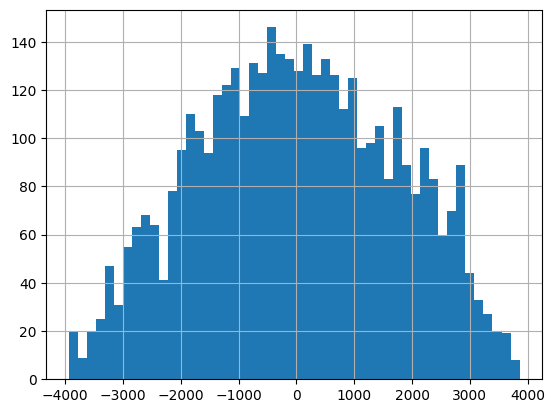

In [126]:
iv_qsda_scores["IDX_DIFF"].hist(bins = 50)

In [127]:
def vec_div(vec):
    mat1 = numpy.repeat(vec.reshape(-1, 1), repeats = len(vec), axis = 1)
    mat2 = numpy.repeat(vec.reshape(1, -1), repeats = len(vec), axis = 0)
    return numpy.sign(mat1 - mat2)

qsda = vec_div(iv_qsda_scores["score"].to_numpy())
iv = vec_div(iv_qsda_scores["IV"].to_numpy())

correct = ((qsda == iv).sum() - iv_qsda_scores.shape[0]) / 2
incorrect = ((qsda != iv).sum() - iv_qsda_scores.shape[0]) / 2

print(correct / 1e6, incorrect / 1e6)

4.293505 4.405115


In [128]:
def sourceFilter(row):
    if row['Source'].startswith('dissim'):
        return 'dissim'
    return row['Source']

iv_qsda_scores[["Source", "Algorithm", "Dimension", "Stat"]] = iv_qsda_scores['name'].str.split(' ', expand = True)
iv_qsda_scores["Source"] = iv_qsda_scores.apply(sourceFilter, axis = 1)
iv_qsda_scores.to_csv(f"{subj}/{exp}/IV/iv_qsda_scores.csv", index = False)

In [129]:
def SourceRenamer(initial: str) -> str:
    if initial == 'dissim':
        return 'Correlations analysis'
    if initial == 'overall':
        return 'Overall processing'
    ind = initial.find('-') + 1
    comp = int(initial[ind:])
    return f'Comp. {comp} (ch. {epochs.ch_names[comp]})'

def AlgorithmRenamer(row):
    return {
        'amplitude-betti-1':        'Betti amp. with p=1',
        'amplitude-betti-2':        'Betti amp. with p=2',

        'amplitude-bottleneck':     'Bottleneck amp.',
        'amplitude-wasserstein-1':  'Wasserstein amp. with p=1',
        'amplitude-wasserstein-2':  'Wasserstein amp. with p=2',
        
        'amplitude-landscape-1-1':  'Pers. landscape amp. with p=1',
        'amplitude-landscape-1-2':  'Pers. landscape amp. with p=1',
        'amplitude-landscape-2-1':  'Pers. landscape amp. with p=2',
        'amplitude-landscape-2-2':  'Pers. landscape amp. with p=2',
        
        'amplitude-silhouette-1-1': 'Pers. silhouette amp. with p=1',
        'amplitude-silhouette-1-2': 'Pers. silhouette amp. with p=1',
        'amplitude-silhouette-2-1': 'Pers. silhouette amp. with p=2',
        'amplitude-silhouette-2-2': 'Pers. silhouette amp. with p=2',

        'bd2':                      'Stat. char. of (b + d) / 2',
        'life':                     'Stat. char. of lifetimes',
        'betti':                    'Stat. char. of Betti curves',
        'landscape':                'Stat. char. of pers. landscape',
        'silhouette-1':             'Stat. char. of lvl 1 pers. silh.',
        'silhouette-2':             'Stat. char. of lvl 2 pers. silh.',
        
        'entropy':                  'Persistence entropy',
        'numberofpoints':           'Number of points',
    }[row]

def DimensionRenamer(row):
    return {
        'all':        'All',
        'dim-1':      'Dimension 1',
        'dim-2':      'Dimension 2',
        'dim-3':      'Dimension 3',
        'dim-4':      'Dimension 4',
        'dim-5':      'Dimension 5',
        'norm-1':     'Amplitude norm with p=1',
        'norm-2':     'Amplitude norm with p=2',
    }[row]

def StatRenamer(row):
    return {
        'kurtosis':      'Kurtosis',
        'skew':          'Skew',
        'max':           'Maximum',
        'mean':          'Mean',
        'median':        'Median',
        'norm-1':        'Norm with p=1',
        'norm-2':        'Norm with p=2',
        'percentile-25': 'Percentile - 25',
        'percentile-75': 'Percentile - 75',
        'std':           'Standard deviation',
        'sum':           'Sum',
    }[row]

def make_stats(data: pandas.DataFrame, group_by: str, sort_by: str):
    stats = data.groupby(by = group_by).mean(numeric_only = True)
    stats = stats.sort_values(by = sort_by).reset_index()
    stats.to_csv(f"{subj}/{exp}/IV/stats_{group_by}_{sort_by}.csv", index = False)
    return stats

def draw(
    data: pandas.DataFrame,
    group_by: str,
    sort_by: str,
    ax,
    renamer: typing.Callable[[str], str],
    title: str
):
    stats = make_stats(data, group_by, sort_by)
    stats[group_by] = stats[group_by].apply(renamer)
    stats.plot.barh(x = group_by, y = sort_by, ax = ax, xlim = (2 * stats[sort_by].min() / 3, None))

    ax.set_title(title)
    ax.get_legend().remove()
    ax.xaxis.set_label_text('')
    ax.yaxis.set_label_text('')

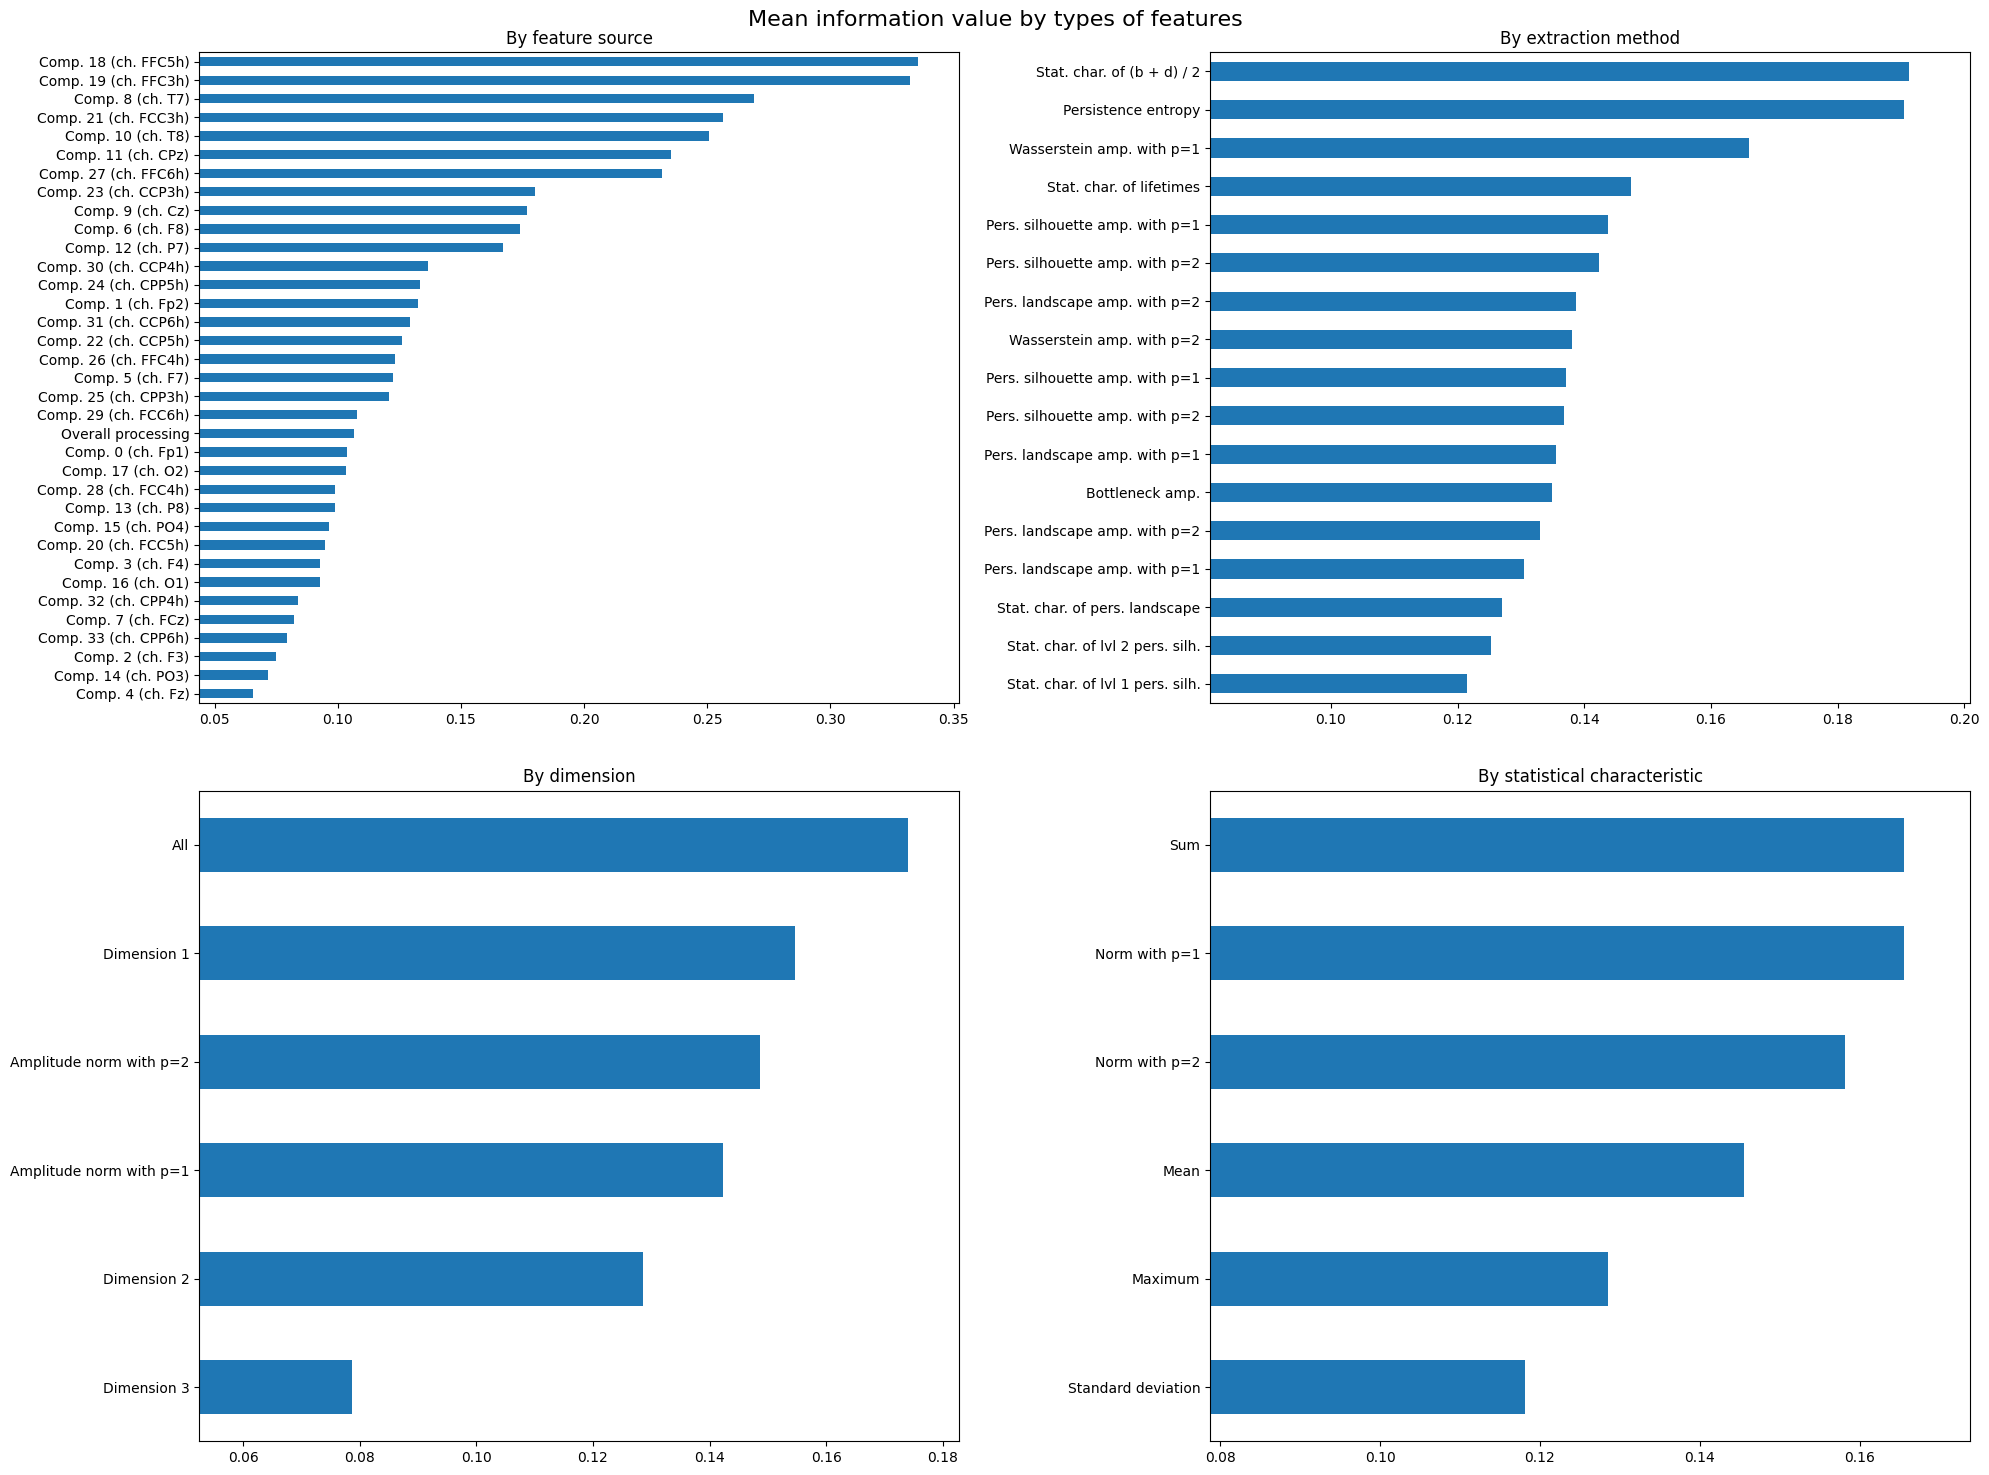

In [130]:
fig, axes = plt.subplots(2, 2, figsize = (20, 15))
fig.suptitle('Mean information value by types of features', fontsize = 16)

draw(iv_qsda_scores, 'Source', 'IV', axes.flat[0], SourceRenamer, 'By feature source')
draw(iv_qsda_scores, 'Algorithm', 'IV', axes.flat[1], AlgorithmRenamer, 'By extraction method')
draw(iv_qsda_scores, 'Dimension', 'IV', axes.flat[2], DimensionRenamer, 'By dimension')
draw(iv_qsda_scores, 'Stat', 'IV', axes.flat[3], StatRenamer, 'By statistical characteristic')

fig.tight_layout(h_pad = 3)
fig.savefig(f"{subj}/{exp}/IV/feature_agg_by_iv.svg")
fig.savefig(f"{subj}/{exp}/IV/feature_agg_by_iv.png")

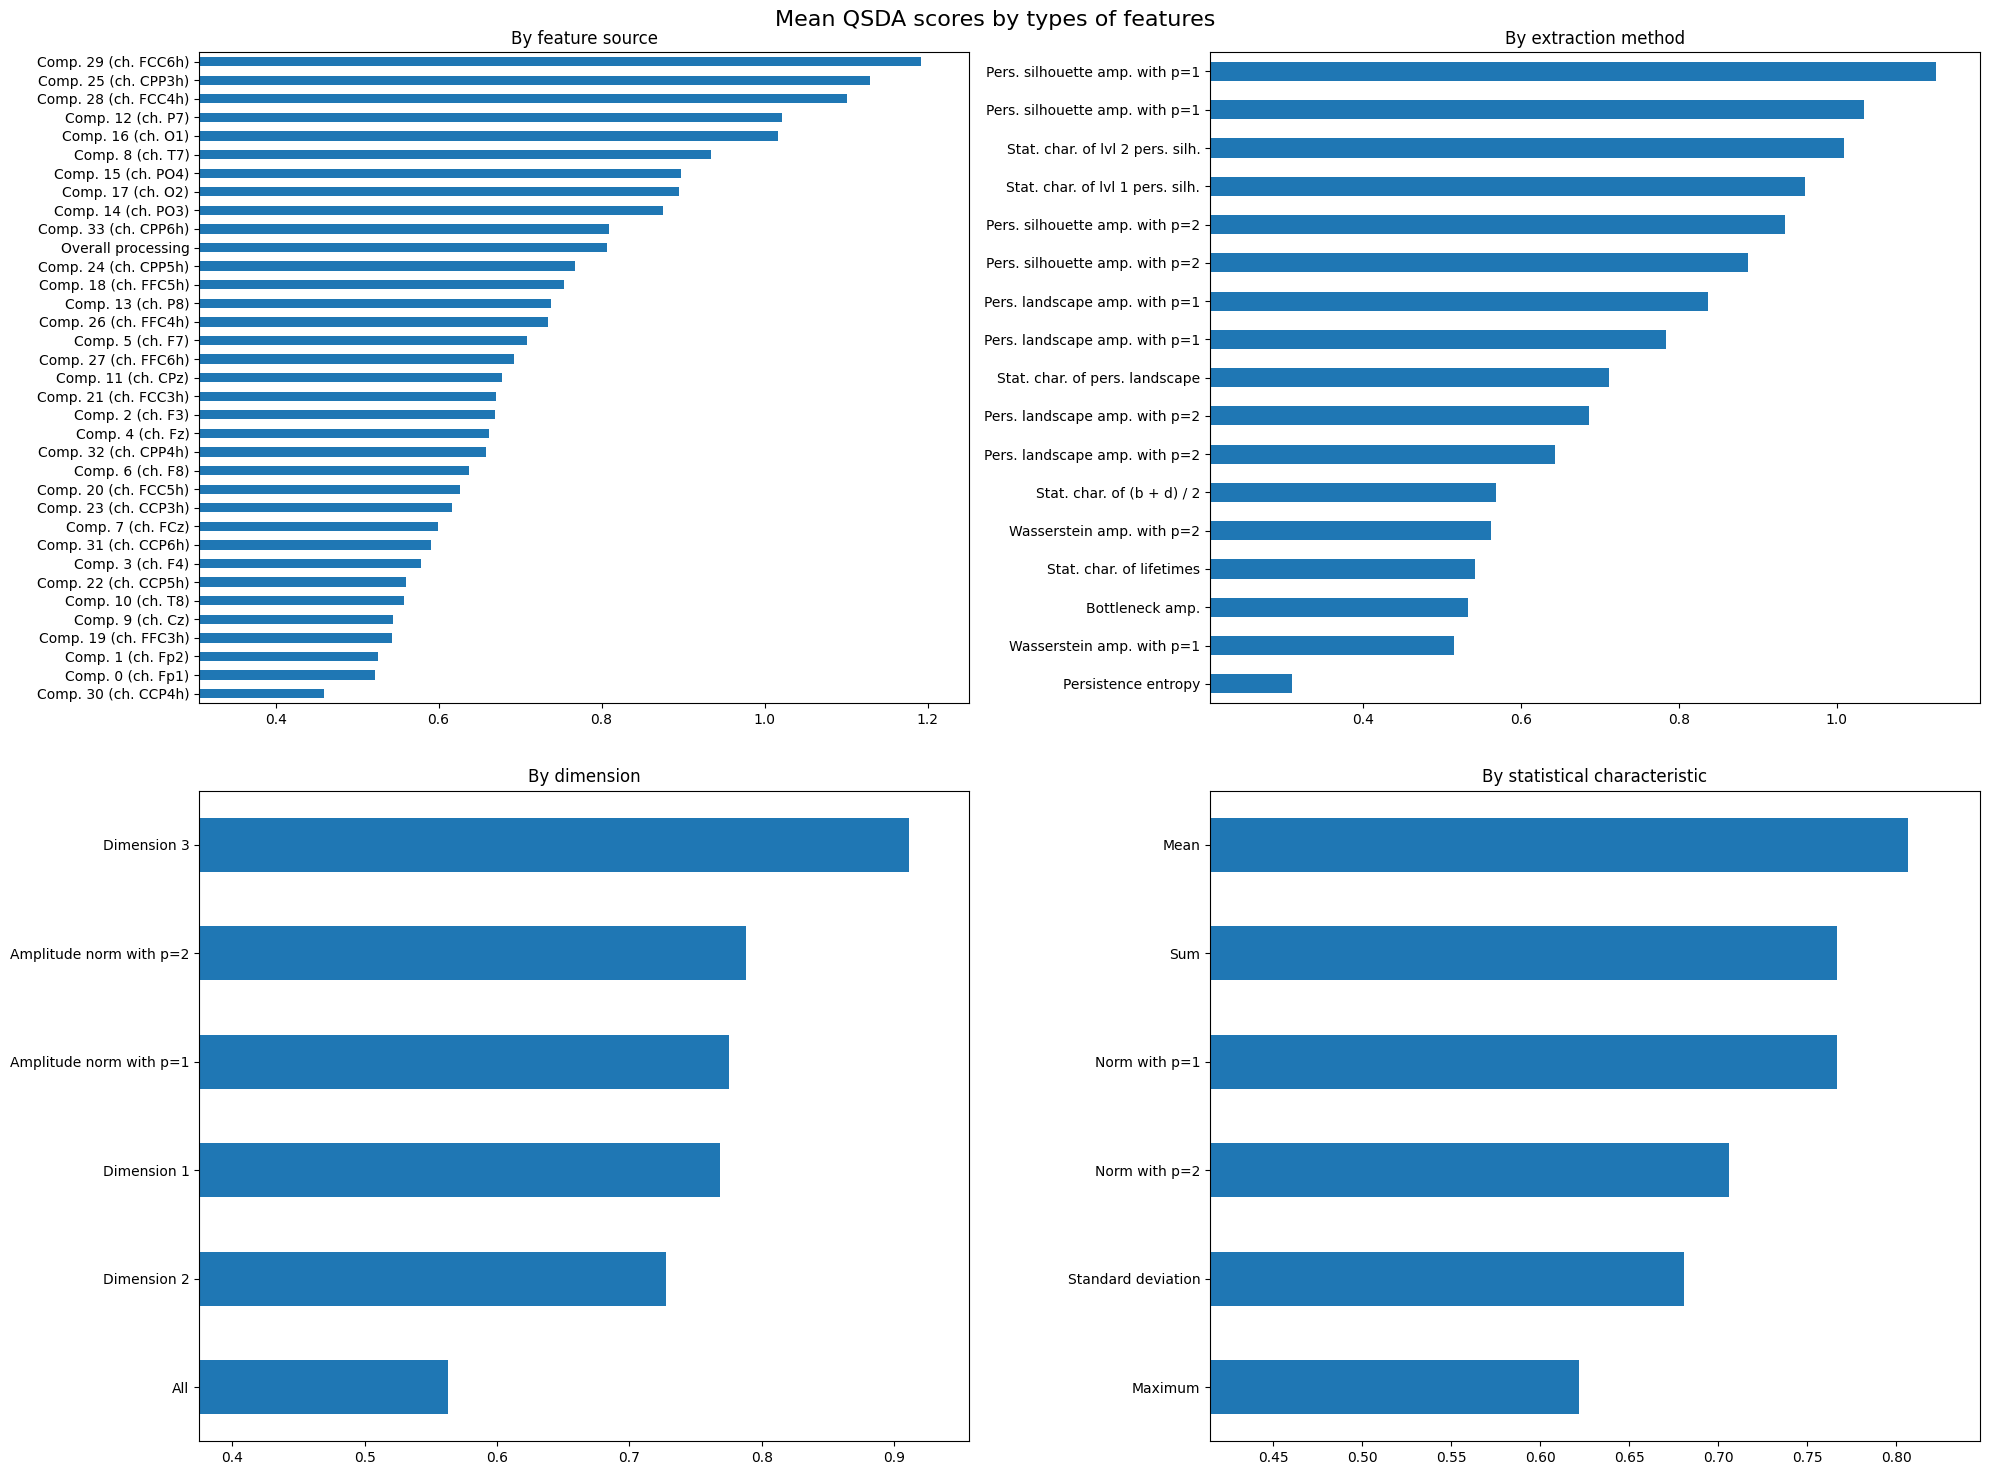

In [131]:
fig, axes = plt.subplots(2, 2, figsize = (20, 15))
fig.suptitle('Mean QSDA scores by types of features', fontsize = 16)

draw(iv_qsda_scores, 'Source', 'score', axes.flat[0], SourceRenamer, 'By feature source')
draw(iv_qsda_scores, 'Algorithm', 'score', axes.flat[1], AlgorithmRenamer, 'By extraction method')
draw(iv_qsda_scores, 'Dimension', 'score', axes.flat[2], DimensionRenamer, 'By dimension')
draw(iv_qsda_scores, 'Stat', 'score', axes.flat[3], StatRenamer, 'By statistical characteristic')

fig.tight_layout(h_pad = 3)
fig.savefig(f"{subj}/{exp}/IV/feature_agg_by_qsda.svg")
fig.savefig(f"{subj}/{exp}/IV/feature_agg_by_qsda.png")

In [132]:
def draw_sources_heatmap(data: pandas.DataFrame, sort_by: str):
    stats = make_stats(data, "Source", sort_by)[["Source", sort_by]]
    stats = stats[stats.apply(lambda row: row['Source'].startswith('channel-'), axis = 1)]

    scores = numpy.zeros(38)
    for _, row in stats.iterrows():
        id = int(row['Source'][row['Source'].find('-') + 1:])
        scores[id] = row[sort_by]

    svg = SDA.analytics.draw_sources_heatmap(scores)
    file = f"{subj}/{exp}/IV/{sort_by}_regions.svg"
    open(file, "w").write(svg)
    return IPython.display.SVG(file)

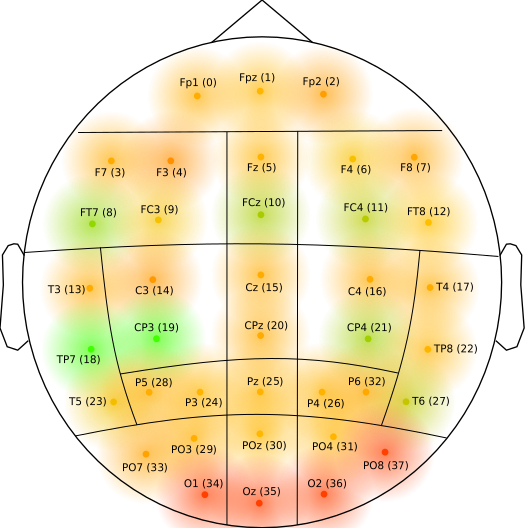

In [133]:
draw_sources_heatmap(iv_qsda_scores, "IV")

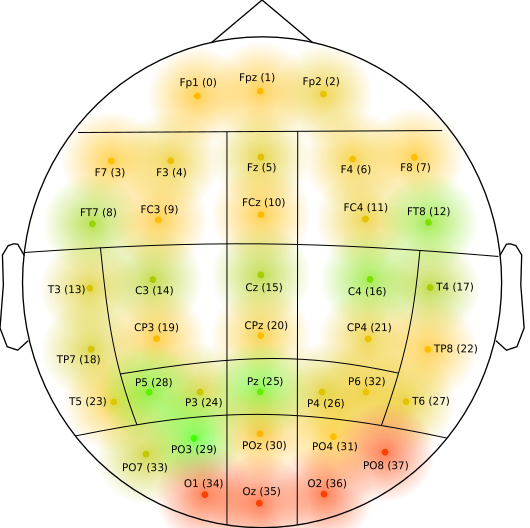

In [134]:
draw_sources_heatmap(iv_qsda_scores, "score")